importing Jupyter notebook from model_training.ipynb
importing Jupyter notebook from data_preprocessing.ipynb
importing Jupyter notebook from data_analysation.ipynb
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class

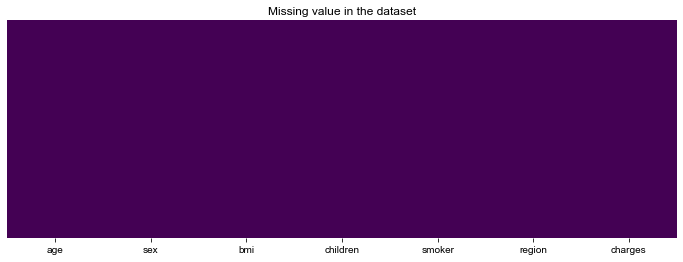

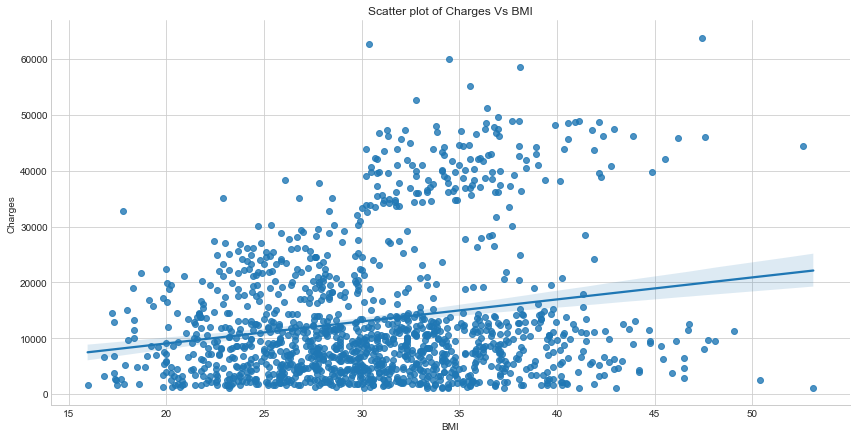

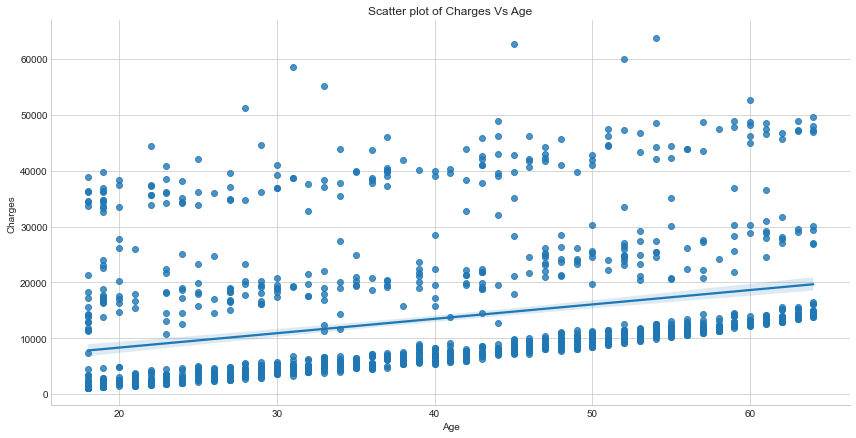

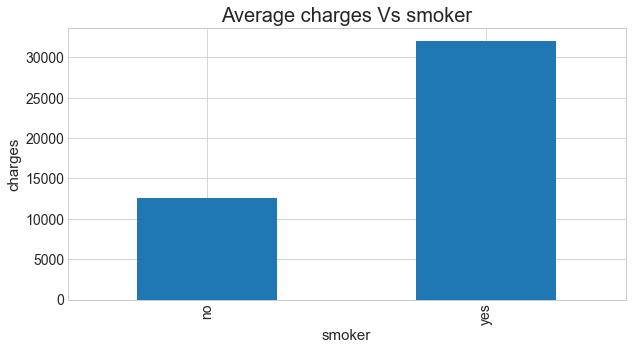

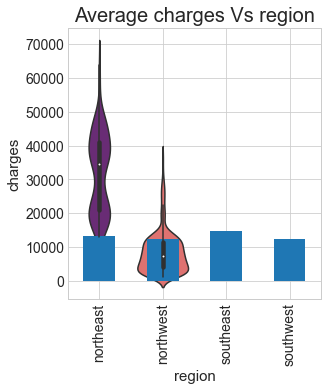

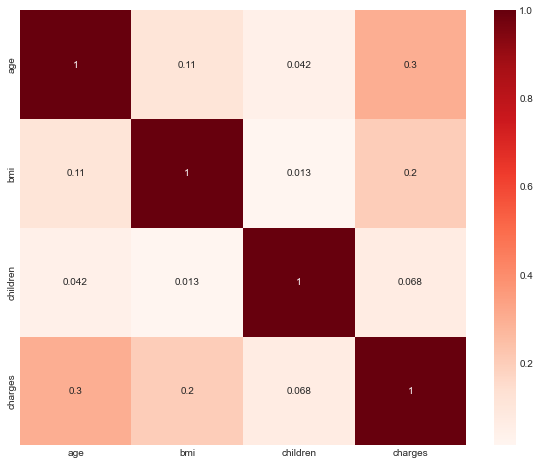

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64
      age     bmi  children      charges  Gender  Smoker  Northeast  \
0      19  27.900         0  16884.92400       1       1          0   
1      18  33.770         1   1725.55230       0       0          0   
2      28  33.000         3   4449.46200       0       0          0   
3      33  22.705         0  21984.47061       0       0          0   
4      32  28.880         0   3866.85520       0       0          0   
...   ...     ...       ...          ...     ...     ...        ...   
1333   50  30.970         3  10600.54830       0       0          0   
1334   18  31.920         0   2205.98080       1       0          1   
1335   18  36.850         0   1629.83350       1       0          0   
1336   21  25.800         0   2007.94500       1       0          0   
1337   61  29.070         0  29141.36030       1       1          0   

      Northwest  Southeast  South

In [1]:
#import libraries

import numpy as np
import import_ipynb
import pandas as pd
import seaborn as sns
from math import sqrt
import model_training as mt
import matplotlib.pyplot as plt

from numpy import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Model Accuracy on training dataset 

print('The Accuracy of the training Dataset method #1 is: ', mt.lin_reg.score(mt.X_train, mt.y_train))
print('The Accuracy of the training Dataset method #2 is: ', r2_score(mt.y_train, mt.y_pred_train))
print(" ")

# Model Accuracy on testing dataset 
print('The Accuracy of the testing Dataset is: ', mt.lin_reg.score(mt.X_test, mt.y_test))
print(" ")

# The Root Mean Squared Error
print('The RMSE on training Dataset is: ', sqrt(mean_squared_error(mt.y_train, mt.y_pred_train)))
print('The RMSE on testing Dataset is: ', sqrt(mean_squared_error(mt.y_test, mt.y_pred_test)))
print(" ")

# The Root Mean Absolute Error
print('The MAE on training Dataset is: ', mean_absolute_error(mt.y_train, mt.y_pred_train))
print('The MAE on testing Dataset is: ', mean_absolute_error(mt.y_test, mt.y_pred_test))
print(" ")

# Coefficiants
lm = LinearRegression()
lm.fit(mt.X_train,mt.y_train)
print('Coefficiants are: ', lm.coef_)
print(" ")

# The Intercept
print('Intercept is: ', lm.intercept_)
print(" ")

The Accuracy of the training Dataset method #1 is:  0.7618780003618577
The Accuracy of the training Dataset method #2 is:  0.7618780003618577
 
The Accuracy of the testing Dataset is:  0.716612443233172
 
The RMSE on training Dataset is:  6047.839439887366
The RMSE on testing Dataset is:  6066.309247641077
 
The MAE on training Dataset is:  4175.618401731289
The MAE on testing Dataset is:  4226.647664219915
 
Coefficiants are:  [12255.67738315 12416.35354853  3071.06706773   278.28062994
 24318.01559932   282.35103013   536.72976334  -469.29162232
  -349.78917116]
 
Intercept is:  -2792.2196537750533
 


C:\Users\Vibuda\AppData\Local\Temp\ipykernel_8596\583150913.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([mt.y_train.min(), mt.y_train.max()], [mt.y_train.min(), mt.y_train.max()], 'k--', color='red', lw=3)


Text(0.5, 1.0, 'Actual vs Predicted Value')

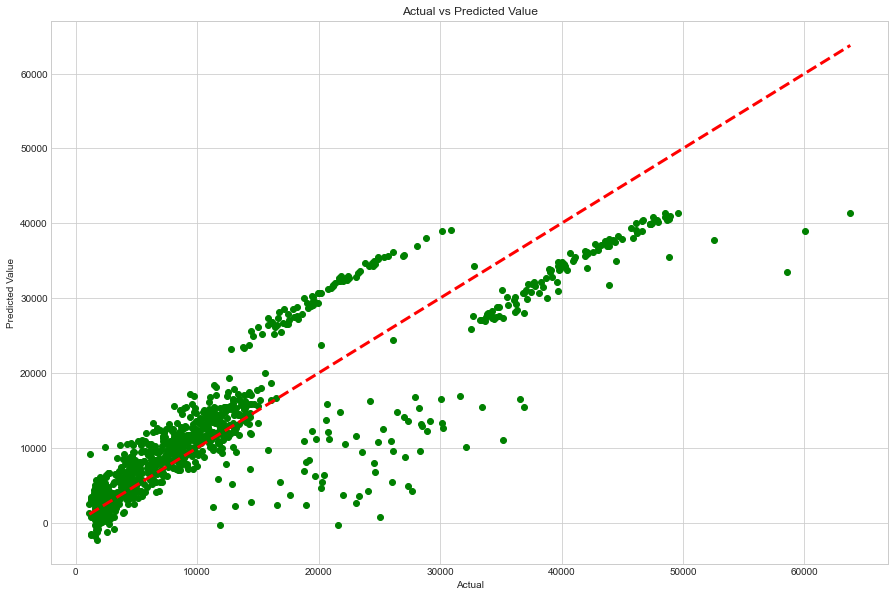

In [3]:
# Plotting Actual and Predicted data 

plt.figure(figsize=(15,10))

plt.scatter(mt.y_train, mt.y_pred_train, c='green')
plt.plot([mt.y_train.min(), mt.y_train.max()], [mt.y_train.min(), mt.y_train.max()], 'k--', color='red', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value')

C:\Users\Vibuda\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual vs Predicted Value')

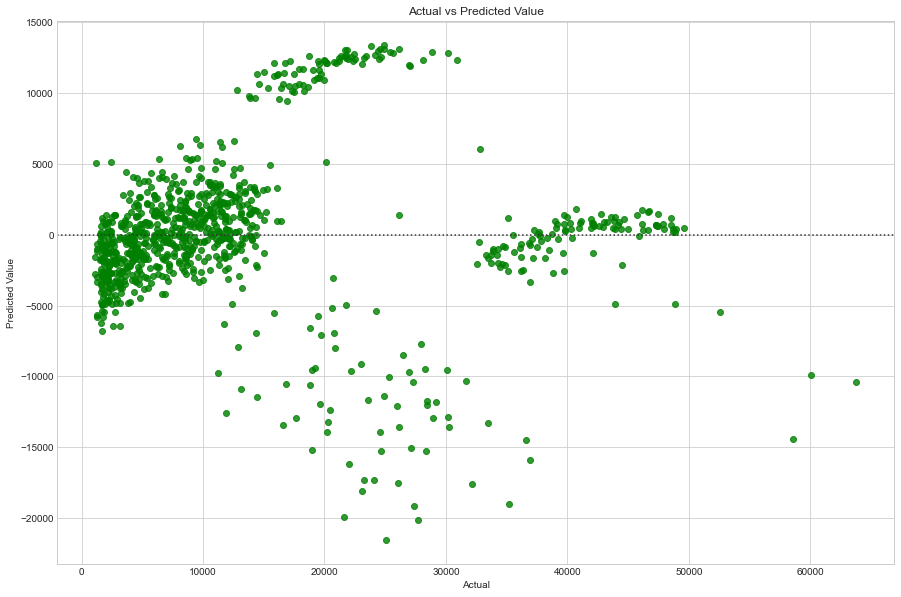

In [4]:
# Plotting Residuals 

plt.figure(figsize=(15,10))

sns.residplot(mt.y_train, mt.y_pred_train, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Value')

In [15]:
mt.x2.columns

Index(['age', 'bmi', 'children', 'Gender', 'Smoker', 'Northeast', 'Northwest',
       'Southeast', 'Southwest'],
      dtype='object')

Using Linear Regression model to make predicions 

In [7]:
# Passing Coeff into a table 

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1, 9)

# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [mt.x2.columns])

# Displaying 
Coeff_df

,age,bmi,children,Gender,Smoker,Northeast,Northwest,Southeast,Southwest
0,12255.677383,12416.353549,3071.067068,278.28063,24318.015599,282.35103,536.729763,-469.291622,-349.789171


In [19]:
# Variables 

age = 23
bmi = 22.2
children = 4
Gender = 1
Smoker = 1

Regions = 'Northeast'

# Prediction Calculator 
predi = (lm.intercept_) + (Coeff_df[Regions].values[0] * 1) + (Coeff_df['Smoker'].values[0] * Smoker) + (Coeff_df['Gender'].values[0] * Smoker) 
+ (Coeff_df['children'].values[0] * 1)

print('Predicted value is: ', predi)


Predicted value is:  [22086.42760562]
